In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ames Data Set

In [243]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [244]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Ames Housing Feature Description

In [2]:
with open('../DATA/Ames_Housing_Feature_Description.txt') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<Axes: >

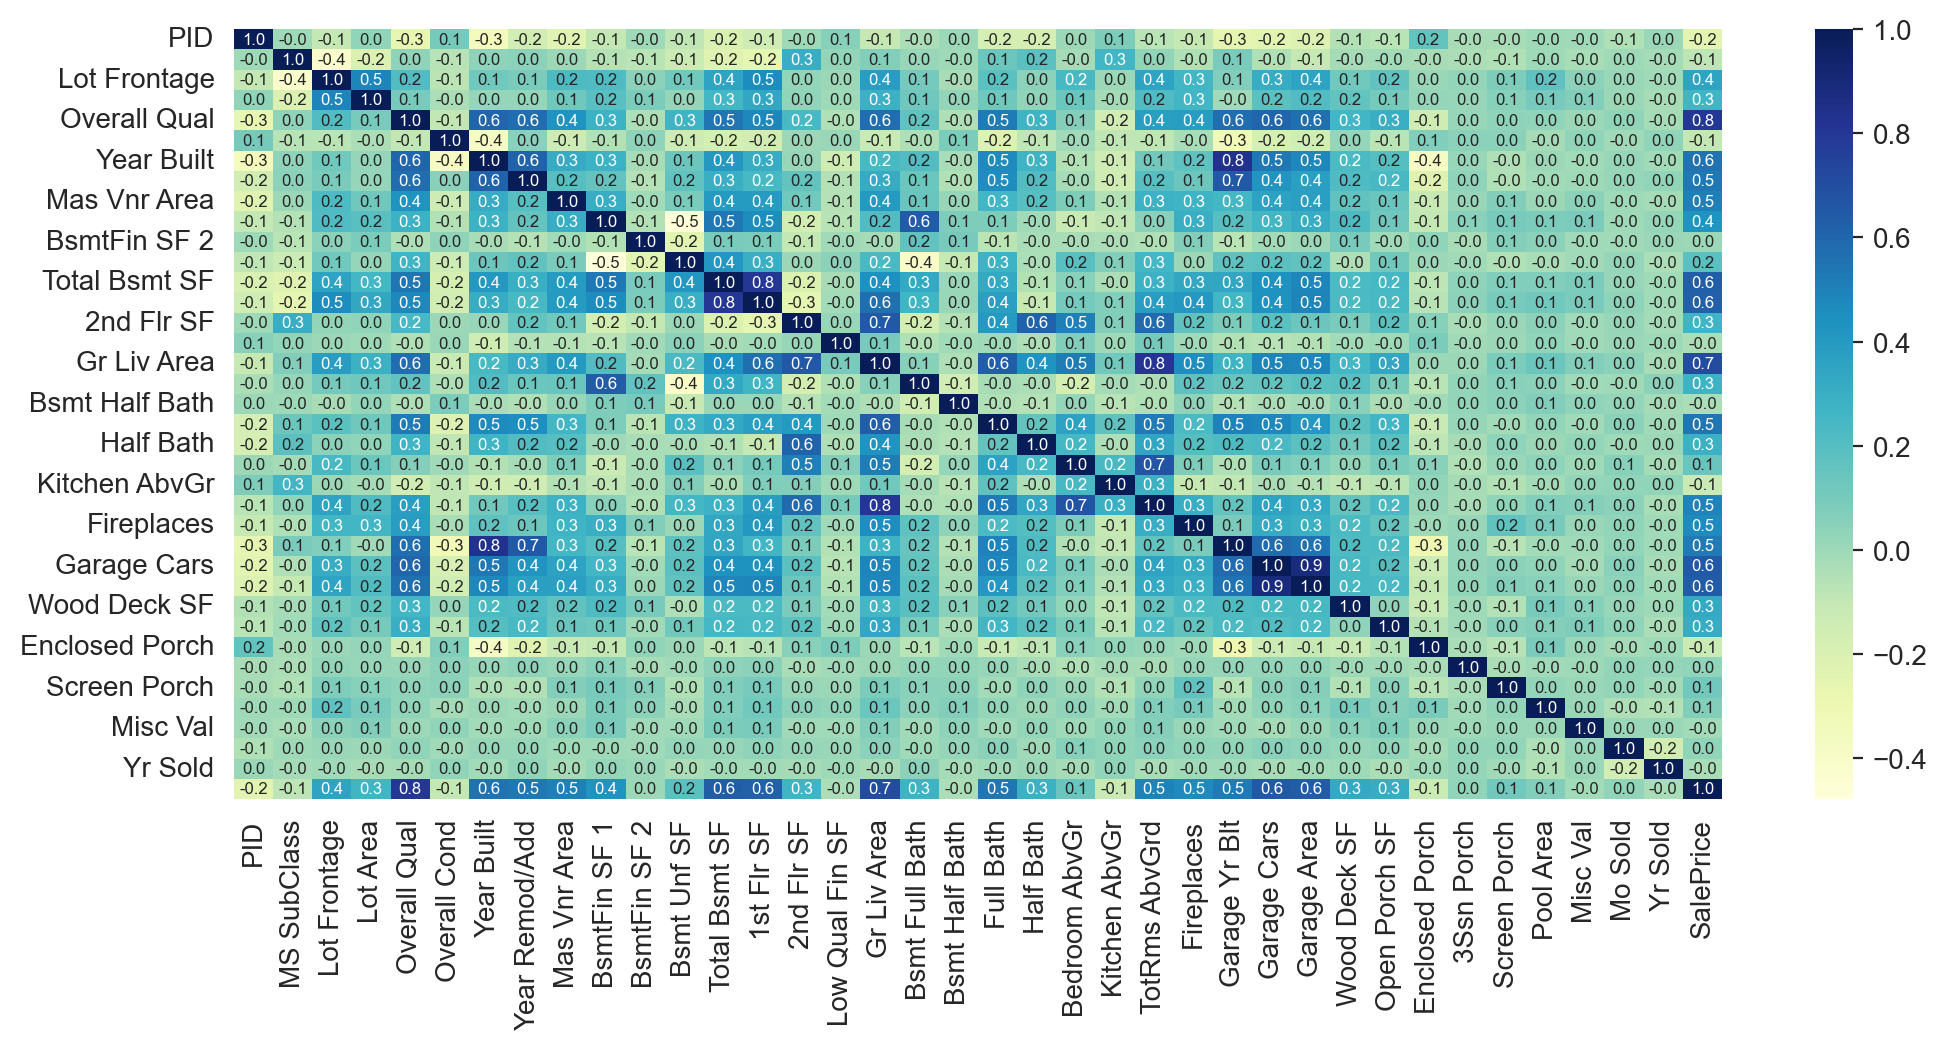

In [245]:
plt.figure(figsize=(12,5), dpi=200)
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, fmt='.1f', 
            linecolor='black',
            cmap="YlGnBu", 
            annot_kws={"fontsize":6})

In [246]:
df_corr = pd.DataFrame(df.corr(numeric_only=True)['SalePrice'].sort_values())

In [247]:
df_corr

,SalePrice
PID,-0.246521
Enclosed Porch,-0.128787
Kitchen AbvGr,-0.119814
Overall Cond,-0.101697
MS SubClass,-0.085092
Low Qual Fin SF,-0.037660
Bsmt Half Bath,-0.035835
Yr Sold,-0.030569
Misc Val,-0.015691
BsmtFin SF 2,0.005891


<Axes: xlabel='SalePrice', ylabel='Count'>

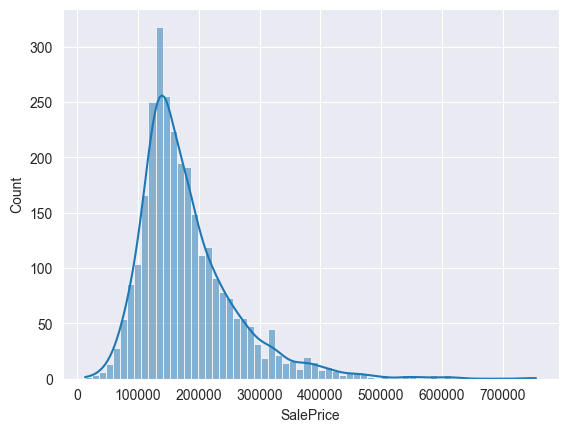

In [248]:
sns.set_style('darkgrid')
sns.histplot(df["SalePrice"], kde=True)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

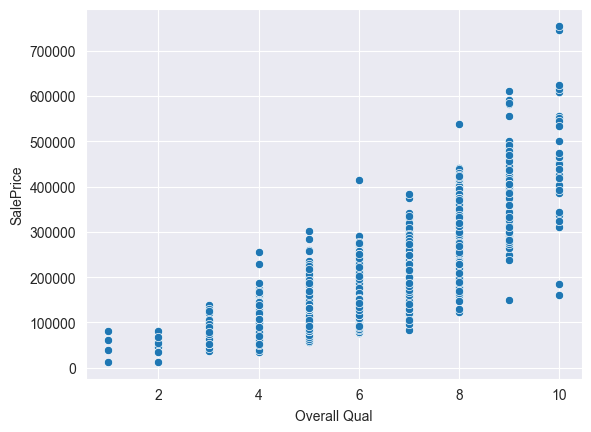

In [249]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

## Delete outliers 

In [250]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

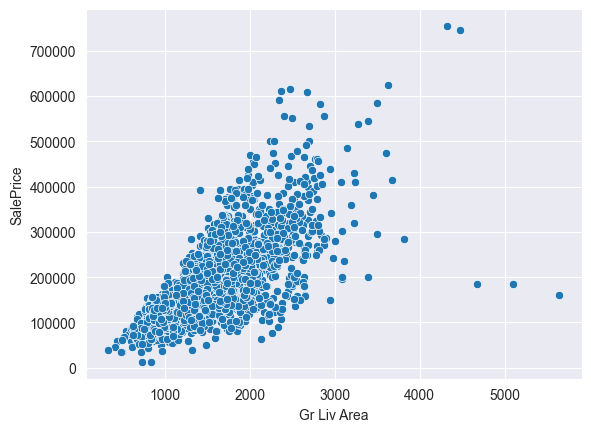

In [251]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [252]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [253]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [254]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [255]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

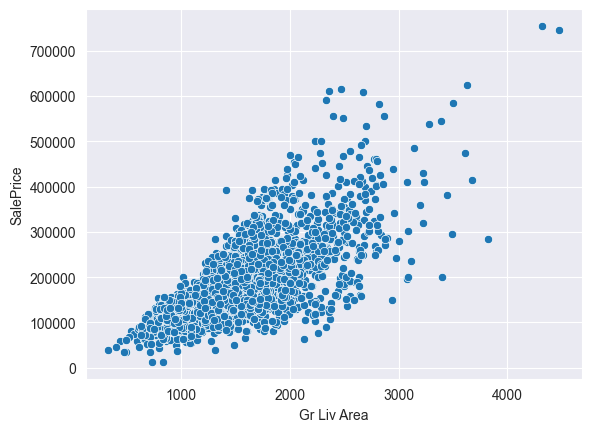

In [256]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

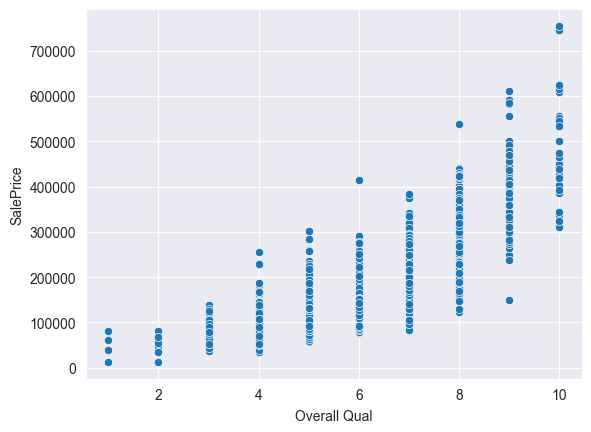

In [257]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [258]:
df_corr

,SalePrice
PID,-0.246521
Enclosed Porch,-0.128787
Kitchen AbvGr,-0.119814
Overall Cond,-0.101697
MS SubClass,-0.085092
Low Qual Fin SF,-0.037660
Bsmt Half Bath,-0.035835
Yr Sold,-0.030569
Misc Val,-0.015691
BsmtFin SF 2,0.005891


In [259]:
df = df.drop('PID',axis=1)

In [260]:
len(df.columns)

80

In [261]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [262]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [263]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

### Let's choose some threshold value and agree that when it is exceeded, we decide to delete rows (instead of replacing the missing value with some other value). We will choose a threshold value of 1%.

In [264]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()

    sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')
    plt.xticks(rotation=90)
    
    return percent_nan

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


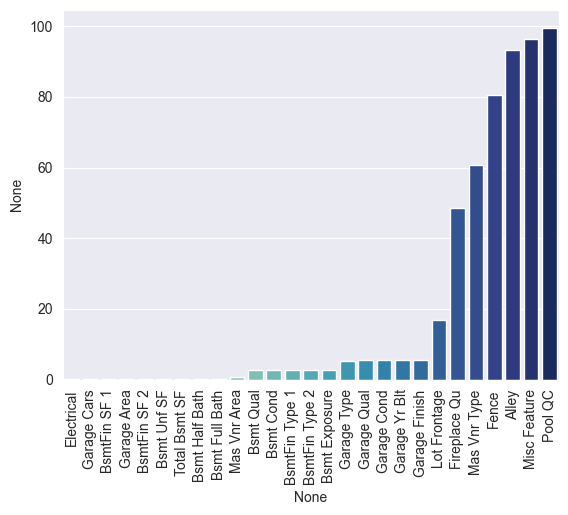

In [265]:
percent_nan = percent_missing(df)

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


(0.0, 1.0)

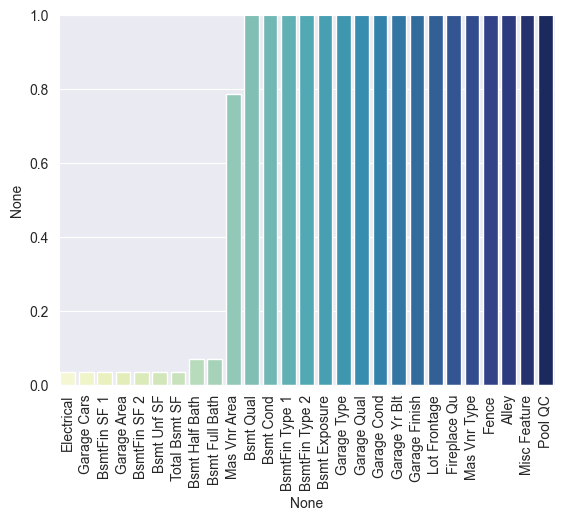

In [266]:
percent_missing(df)
plt.ylim(0,1)

In [267]:
# Сравниваем с пороговым значением
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [268]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [269]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [270]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [271]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


(0.0, 1.0)

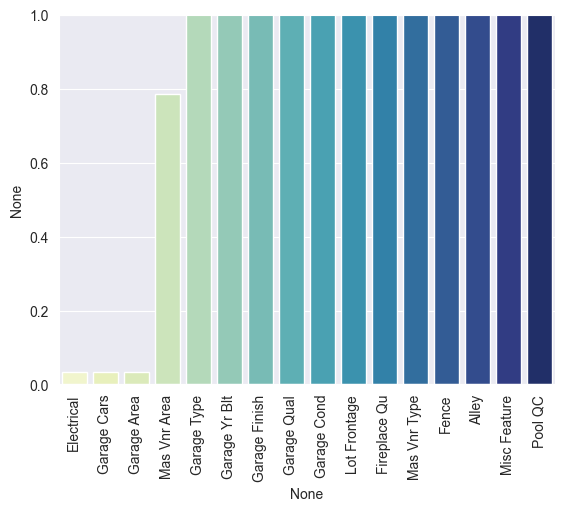

In [272]:
percent_nan = percent_missing(df)
plt.ylim(0,1)

In [273]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


(0.0, 1.0)

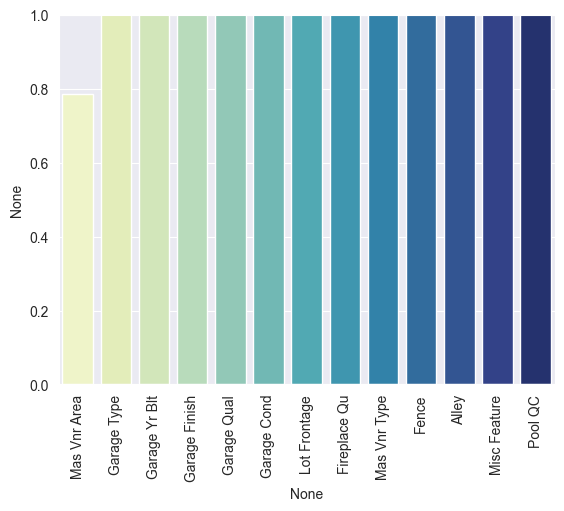

In [274]:
percent_nan = percent_missing(df)
plt.ylim(0,1)

### Based on the textual description of the dataset, missing data in the Mas Vnr Type and Mas Vnr Area features most likely means that the house does not have stone cladding, in which case we will specify a value of zero, as we have done previously for the other features.

In [275]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


(0.0, 1.0)

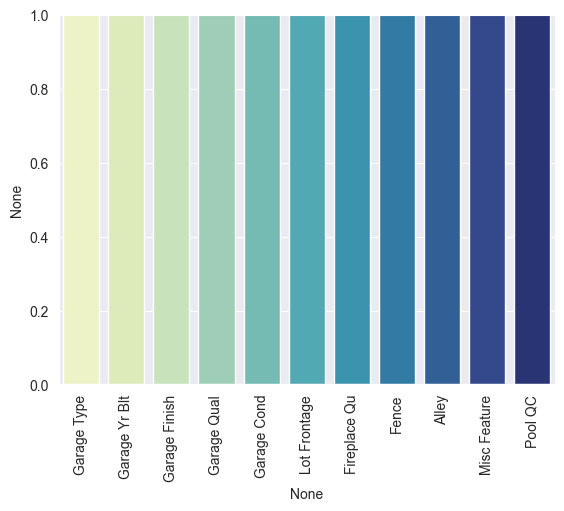

In [276]:
percent_nan = percent_missing(df)
plt.ylim(0,1)

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

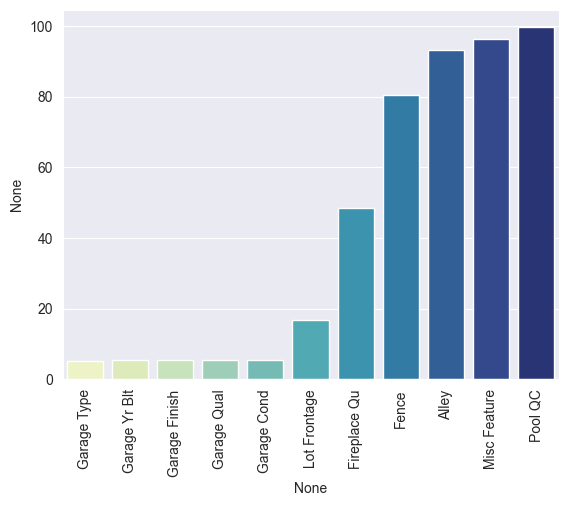

In [277]:
 percent_missing(df)

In [278]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


### Judging by the data description, the value NaN means no garage, so we will write the value "None" or 0.

In [279]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [280]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


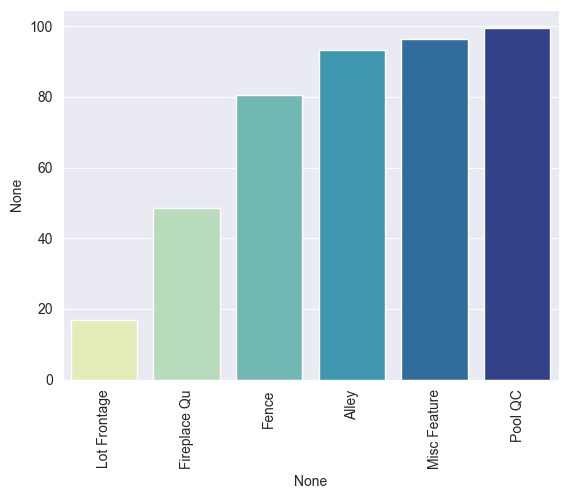

In [281]:
percent_nan = percent_missing(df)

### If values are missing in a sufficiently large number of rows, then it makes sense to remove such columns completely. For example, if 99% of the rows have an undefined value in a feature, then that feature cannot be used to predict the target variable because almost all the data in that feature is undefined. In our dataset, many of the features with a large number of NaN values should essentially contain the values "none" or 0. But to show you different options for dealing with missing values, we will remove these features instead of filling the missing values with zeros or "none" ".

In [282]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [283]:
df[percent_nan.index]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [284]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


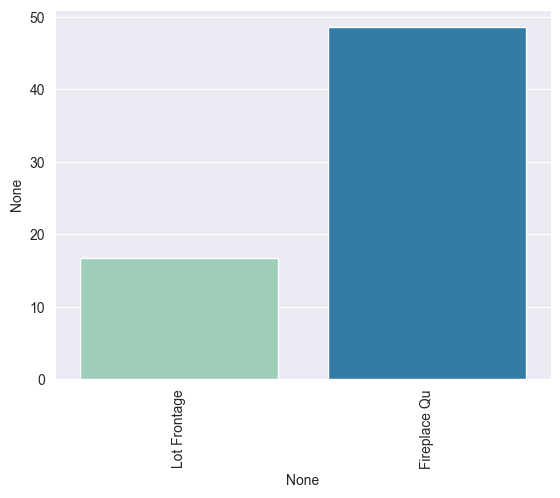

In [285]:
percent_nan = percent_missing(df)

### Filling the Fireplace Quality column based on the text description

In [286]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


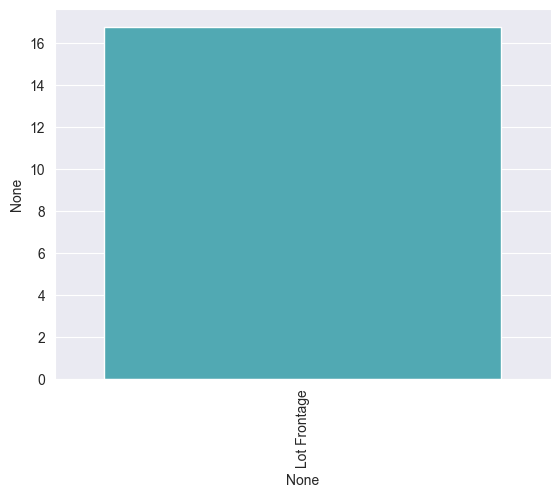

In [287]:
percent_nan = percent_missing(df)

### To replace missing data in a given feature, we need to decide which of the other features (without NaN values) best correlates with our feature. In our example we will work with the following characteristics:

### Neighborhood: areas within the city limits of Ames

### LotFrontage: width of the front side of the house (street side), in feet

### We will work under the assumption that the Lot Frontage feature correlates with the neighborhood feature.

In [288]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

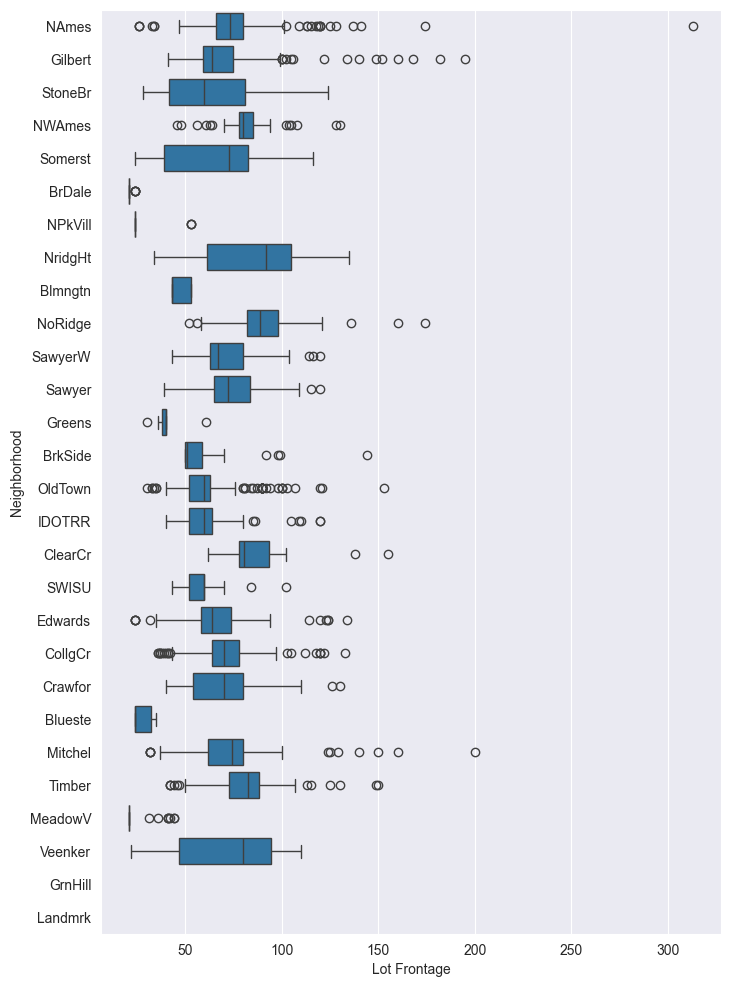

In [289]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [290]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [291]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [292]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [293]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [294]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

C:\Users\Булат\AppData\Local\Temp\ipykernel_12572\2763767883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='YlGnBu')


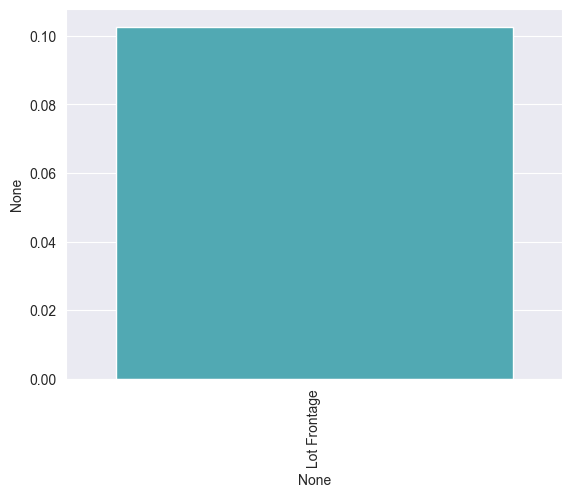

In [295]:
percent_nan = percent_missing(df)

In [296]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

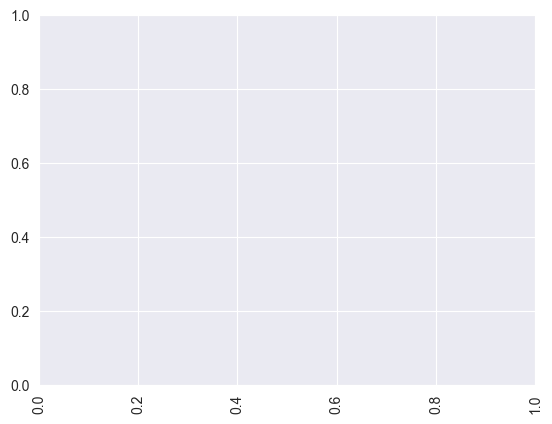

In [297]:
percent_nan = percent_missing(df)

In [298]:
# Конвертация в строку
df['MS SubClass'] = df['MS SubClass'].apply(str)

### Creating Dummy Variables Based on Columns

In [299]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [300]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [301]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath        29

In [302]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qual   

In [303]:
df_objs.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [304]:
df_objs = pd.get_dummies(df_objs,drop_first=True, dtype=int)

In [305]:
df_objs.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [306]:
df = pd.concat([df_nums,df_objs],axis=1)

In [307]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [308]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [401]:
X = df.drop('SalePrice', axis=1)

In [402]:
X.shape

(2925, 273)

In [403]:
y = df['SalePrice']

In [404]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2925, dtype: int64

In [405]:
from sklearn.model_selection import train_test_split

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [407]:
X_train.shape

(2632, 273)

In [408]:
X_test.shape

(293, 273)

In [409]:
from sklearn.preprocessing import StandardScaler

In [410]:
scaler = StandardScaler()

In [411]:
scaler.fit(X_train)

StandardScaler()

In [412]:
X_train = scaler.transform(X_train)

In [413]:
X_test = scaler.transform(X_test)

In [322]:
from sklearn.linear_model import ElasticNet

In [323]:
model = ElasticNet(max_iter=1000000)

In [340]:
param_grid = {'alpha':[100,200,300,400,1000], 'l1_ratio':[1.0]}

In [341]:
from sklearn.model_selection import GridSearchCV

In [342]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=20,
                          verbose=3,)

In [343]:
grid_model.fit(X_train, y_train)

Fitting 20 folds for each of 5 candidates, totalling 100 fits
[CV 1/20] END .alpha=100, l1_ratio=1.0;, score=-658350857.534 total time=   0.3s
[CV 2/20] END .alpha=100, l1_ratio=1.0;, score=-517058506.020 total time=   0.3s
[CV 3/20] END .alpha=100, l1_ratio=1.0;, score=-348968645.083 total time=   0.2s
[CV 4/20] END .alpha=100, l1_ratio=1.0;, score=-927332829.746 total time=   0.2s
[CV 5/20] END .alpha=100, l1_ratio=1.0;, score=-339518508.340 total time=   0.2s
[CV 6/20] END .alpha=100, l1_ratio=1.0;, score=-494216366.708 total time=   0.3s
[CV 7/20] END .alpha=100, l1_ratio=1.0;, score=-859279654.750 total time=   0.3s
[CV 8/20] END .alpha=100, l1_ratio=1.0;, score=-675084154.922 total time=   0.3s
[CV 9/20] END .alpha=100, l1_ratio=1.0;, score=-376863125.420 total time=   0.3s
[CV 10/20] END alpha=100, l1_ratio=1.0;, score=-336513341.197 total time=   0.3s
[CV 11/20] END alpha=100, l1_ratio=1.0;, score=-426197760.123 total time=   0.3s
[CV 12/20] END alpha=100, l1_ratio=1.0;, score=

GridSearchCV(cv=20, estimator=ElasticNet(),
             param_grid={'alpha': [100, 200, 300, 400, 1000],
                         'l1_ratio': [1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [344]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1.0}

In [345]:
np.sqrt(abs(grid_model.best_score_))

22314.02608424538

In [346]:
df['SalePrice'].describe()

count      2925.000000
mean     180815.537436
std       79951.696564
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [347]:
y_elastic_pred = grid_model.predict(X_test)

In [348]:
from sklearn.metrics import mean_squared_error

In [350]:
np.sqrt(mean_squared_error(y_test, y_elastic_pred))

20558.50856689317

In [414]:
from sklearn.linear_model import LinearRegression

In [415]:
linear_model = LinearRegression()

In [416]:
from sklearn.model_selection import cross_val_score

In [421]:
scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=10, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END  score: (test=-135122975248171073006053384882487296.000) total time=   0.0s
[CV] END  score: (test=-104833403985048664459938290194186240.000) total time=   0.0s
[CV] END  score: (test=-10202987776260941621228805346557952.000) total time=   0.0s
[CV] END  score: (test=-157243964086165894726927176916008960.000) total time=   0.0s
[CV] END ....................... score: (test=-378594952.525) total time=   0.0s
[CV] END ... score: (test=-28036715407592391198642274304.000) total time=   0.0s
[CV] END  score: (test=-32504382825088610884782274979561472.000) total time=   0.0s
[CV] END  score: (test=-2081140485537006818484182111485952.000) total time=   0.0s
[CV] END  score: (test=-49236140443998110253762931618480128.000) total time=   0.0s
[CV] END  score: (test=-23512466647538207650969224648589312.000) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [424]:
np.sqrt(abs(scores.mean()))

2.2687826901986976e+17

In [425]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [426]:
y_linear_pred = linear_model.predict(X_test)

In [427]:
mean_squared_error(y_test, y_linear_pred)

435384192.06039095

In [428]:
from sklearn.preprocessing import PolynomialFeatures

In [434]:
polynomial_converter = PolynomialFeatures(degree=2)

In [435]:
poly_features = polynomial_converter.fit_transform(X)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

In [439]:
scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=10, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................... score: (test=-206619996983.460) total time= 1.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] END ................... score: (test=-1001909206733.272) total time=  37.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] END .................... score: (test=-665913239699.550) total time=  41.8s
[CV] END .................... score: (test=-128538831867.642) total time=  37.5s
[CV] END .................... score: (test=-417105489226.364) total time=  41.0s
[CV] END .................... score: (test=-666524373296.189) total time=  41.4s
[CV] END .................... score: (test=-134717126419.796) total time=  40.0s
[CV] END .................... score: (test=-142289365085.723) total time=  34.3s
[CV] END .................... score: (test=-154481944893.311) total time=  33.5s
[CV] END .................... score: (test=-155729023760.580) total time=  33.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.8min finished


In [442]:
np.sqrt(abs(scores.mean()))

606121.1593374618